# Computational Challenge Y1 - 2023/2024

This year, we will try to **solve a (simplified!) version of image analysis**, which will directly link to the design study to be run later in the year.

The final goal will be to write an algorithm in Python that **takes as input images of indentation experiment, finds the indentation region and determine the area**. To get an idea, you can see an indentation image in the folder here.

In practice, the problem can be split into different parts:

1) Take a list of file names as input. Generally speaking, image files from the software taking the pictures will be in `.png` format and need to be converted into a "bitmap" type. For the purpose of the computational challenge, however, `.bmp` files will be directly provided to you, they are in the folder Images/ attached to this challenge. **Only work using the files Image1.bmp and Image2.bmp** (the other two files are extras, see at the end). If you want to generate or check your own `.png` images, you can also use the converter [here](https://cloudconvert.com/png-to-bmp).

**Note**: a bitmap representation is a representation that can be easily converted to a grid of pixels (a small square element), each of which is given a number between 0 (white) and 255 (black). This initial representation must be stored in an appropriate numpy array for later analysis, which can be done using the function provided at the end of this jupyter notebook ( see `convert_bmp_to_array` below ).

2) For each image stored, we will run a "search algorithm", from the so-called Monte Carlo family of algorithms. The algorithm finds the vertices of the shape that best approximates the indentation profile. 

3) Once this shape is found, what is left to do is to calculate the area of this shape. You will also have to plot the vertices of the shape on the original image to check the algorithm has worked, at least approximately!

## 1. Implementing the Monte Carlo search algorithm

We assume that you know how to calculate the area of any arbitrary shape, given an ordered series of points specifying the position of its vertices. This algorithm was covered in the preparatory exercises! 

Here instead, we will focus on the Monte Carlo search (although this has also been used in those exercises...)

As a starting point, in part because of symmetry and in part to simplify the problem, we assume the best shape for our indentantion is a rhombus and that the rhombus centre is in the centre of the image.  
What we need to find the rhombus best approximating the indentation profile is: 
   1. The rhombus orientation
   3. The length of the two diagonals

For the purpose of this computational challenge (but you can think about a better method if you want!), we will **assume** that the best shape to approximate the indentation profile is the one that has the largest possible area, but also that this area is "as dark as possible", more precisely, it has to have a large "density". **By "density" we mean the sum of the values of the pixel inside the approximating rhombus, divided by the total area**. We do this because pixels corresponding to an indented region are darker in colour, and thus their value is larger when saved in a bitmap format. At the same time, we want to make sure that we will cover with our approximating shape as much as possible of the indentation region, and thus we also want to maximise the area.

In practice, we can find the best approximating shape if we could find the minimum of the following function:

$L = - \left(\alpha \frac{A(\{r_i\})}{A_{\rm tot}} + \frac{\sigma(\{r_i\})}{\sigma_{\rm average}}\right)$

with $\alpha>0$ being a parameter that controls the relative importance of maximising the area of the rhombus $A$ vs maximising its "density" $\sigma$ (see parameter values later). $A_{\rm tot}$ and $\sigma_{\rm total}$ are the total area of the image and the average density calculated over the whole image. We use $(\{r_i\})$ as a notation to indicate that both the area and the density depends on the positions $r_i$ of our 4 points determining the rombus (with $i \in \{1,2,3,4\}$).

### 1.1 The search algorithm, step by step

1) Start generating 4 points randomly (but still with the constraint that they form a rhombus!).
2) Calculate the value of $L$ for the generated shape, let us call this value $L_{\rm old}$.
3) "Generate a candidate shape" and calculate $L$ for the new shape. Let us call its value $L_{\rm new}$.
4) If $\Delta L = L_{\rm new} - L_{\rm old} \le 0$ then accept the move and go back to step 3 above. Instead, if $\Delta L > 0$ pick a random number `r` uniformly between 0 and 1 and accept the new candidate shape if $\exp(-\frac{\Delta L}{T})<$`r`, otherwise stay with the old shape. Then go back again to 3) and repeat.

You should stop the algorithm when either you have made at least $10^5$ steps, or if the average of $L$ over the previous 1000 steps has not changed by more than 5% with respect to the previous 1000. Once the algorithm stops, take the best shape encountered (minimum $L$) as your final result. 

> Given the large number of steps, this algorithm might require a few minutes to run on your computer, it will not return a result immediately!

Note that this algorithm does not really minimise the loss function, but allows you to sample shapes with a probability that is higher for those with a smaller value of the loss function. However, you should keep track of the best shape achieved so far. 

### 1.2 Generating a candidate shape

During the Monte Carlo search, in step 3 you are required to generate a new shape by making a (small) modification of the initial one. We will call this a perturbation.

A perturbation can be implemented by choosing randomly between 2 different types of moves, described below. You should implement both these moves or your Monte Carlo search will not work, not even approximately (think about why!).

#### 1) Rotating the rhombus 

1) Choose a random rotation $\delta\theta$ between $(-\Delta\theta_{\rm max},\Delta\theta_{\rm max})$, with $\Delta\theta_{\rm max} = \pi/10$ (in radians). 
2) Rotate the vectors corresponding to each of the vertices of the rhombus by the given angle. You should be able to do this with a little geometry, you can check it [here](https://www.cuemath.com/algebra/rotation-matrix/)

#### 2) Increasing/decreasing the value of one of the two diagonals, 

1) Choose with equal probability one of the two diagonals.
2) Change the size of the given diagonal by a random value between  $(-\delta,\delta)$, with $\delta=20$, measured in pixels. 

> Note that whereas rotations and and increase/decrease of the diagonals is a continuous operation, the final value of the position of your vertices is discrete, that is, you can only approximate a vertex position up to the accuracy of 1 pixel. You need to think a little about how to take this into account. 


### 1.3 Rejecting invalid moves

After each move, you should always check that your shape stays within the boundaries of the figure. If not, you should reject the move (this is equivalent to assuming that shapes that go out of boundary have an infinite value for the loss function).

### 1.4 Parameters values

In principle, $\alpha$ and $T$ (and, similarly, $\Delta\theta_{\rm max}$ and $\delta$) are parameters of your algorithm, and you should play with them to find the optimum value. The optimum for these parameters is the value that allows you, during the Monte Carlo search, to find the shape that has the lowest possible value for the loss function $L$, ideally in the lowest number of iterations. To start, take values of $\alpha=1/2$ and $T=1/5$. If they are fine (because you see they give you a good approximation for the correct shape), you can stick with them, otherwise experiment with different values!

## 2. Requested output to submit via Blackboard

1) One or a series of Jupyter Notebooks implementing the different algorithms required. Also, report the values of the area, in pixels, determined for the files `Image1.bmp` and `Image2.bmp` provided. 

2) An image containing the original image and the position of the vertices. This can be rendered using a `scatterplot` from the `matplotlib` library  (see an example and the code [here]()). Replace each black pixel (value of the corresponding grid point after conversion = 255) by a circle, leaving instead white pixels blank. Points corresponding to the vertices of the best approximating rhombus can be rendered with a red circle centred on the appropriate pixel.

3) A graph where you plot, for one of the images (choose whichever you want from those in the `Image` folder) and one of the Monte Carlo search performed the values of the loss function as a function of the attempted step. 

> Important: you might not be able to get all the way to the end and obtain an accurate answer, in particular if you do not use the right values for some of the parameters in the model. However, **do not despair**! Partial answers are fine, and your code will be evaluated mostly based on whether or not you correctly implemented the requested algorithms, even if you final obtained results are not very accurate. 

## 3. Marking and marking criteria

Coding is a collaborative effort and **all members of the group will receive exactly the same mark**, so everybody is responsible for the work of everybody in the group. There is a single exception to this rule, when a person clearly does not contribute at all. In this case, this person will be given a 0 Mark, and fail.

The marking will be based on the following 5 criteria, each weighting the same:

1. Correct use of Python and its common functionalities
2. Readability & *Ae*sthetic of the code: adding comments when needed, detailing functions with documentation, use of the correct structures / classes,...
3. Use of the correct functionalities in the packages covered during the lectures, especially regarding `numpy` and `matplotlib`
4. Correct implementation of the algorithm described
5. Presentation and correctness of the final results

## 5. Convert `.bmp` files to a numpy array 

In order to be able to process your images, we need to transform them into a form that can be stored in a numpy array, and easily interpreted. To to this, you can use the code in the following cell. At the end of this code, the returned output `data` contains a 2D numpy array of values that are either 0 or 255. If `data[i,j]=0`, the corresponding pixel/grid point `(i,j)` is a white pixel, if `data[i,j]=255` the corresponding grid point is a black pixel.

In [164]:
#### You need to import these libraries to make it work!
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

def convert_bmp_to_array( filename, width = 1000, height = 600 ):
    '''Take the file filename.bmp, of pre-specified height and width (in pixels) and transform it into 
    the equivalent numpy array.
    INPUTS:
    filename: a string containing the name of the file
    width: width of the image, in pixel (keep the default values)
    height: height of the image, in pixel (keep the default values)
    OUTPUT:
    data: a numpy array containing either 0 or 255, if the corresponding pixel is white or black, respectively
    '''
    
    #First a check that the file has the correct extension and is of type bitmap
    if filename[-4:] != ".bmp":
        raise ValueError("The file must be in .bmp format")

    #Image is a specific Python object of the PIL library
    image = Image.open(filename)

    # Convert the image to black and white
    bw_image = image.convert('1')

    # Get the pixel values as a list of zeros and ones
    pixels = list(bw_image.getdata())

    # Convert the pixel values to a list of integers
    zeros_and_ones = [int(p) for p in pixels]
    tot = len( zeros_and_ones )

    #Transform the list into the appropriate numpy array
    data = np.array( zeros_and_ones ).reshape( ( height, width ))
    
    data = -data + 255
    
    return data


#The following just shows how to use this function and visualises the result

def load_image(name):
    data = convert_bmp_to_array( name)
    data = np.array( data, dtype=np.uint8 )
    return data

d1 = load_image("Image1.bmp")
d2 = load_image("Image2.bmp")
d3 = load_image("Image3.bmp")
d4 = load_image("Image4.bmp")
# data = convert_bmp_to_array( "Image2.bmp" )
# plt.imshow(data, cmap='Greys' )
# plt.show()

# # print(data)
# data = np.array( data, dtype=np.uint8 )
# # Make PIL Image from numpy array
# im = Image.fromarray(data)
# # Save
# im.save('result.png')

# # Print the numpy array containing the image in pixels of 0 or 255 values
# print(data)

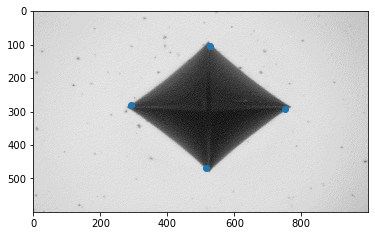

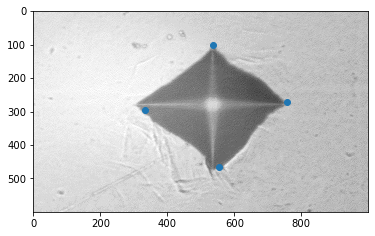

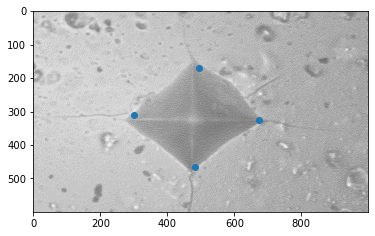

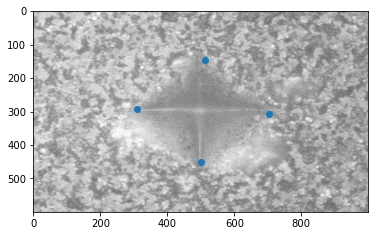

In [184]:
import dataclasses
import cv2
import random

@dataclasses.dataclass
class Rhombus:
    axis1: int
    axis2: int
    rotation: float

    centerX: int
    centerY: int


    def __str__(self):
        corners = self.corners()
        return f"({corners[0]}, {corners[1]}, {corners[2]}, {corners[3]})"

    def corners(self):
        centerX = self.centerX
        centerY = self.centerY
        center = np.array([centerX, centerY])

        rotate = create_rotation(self.rotation)
        axis1 = rotate.dot(np.array([0, self.axis1]))
        axis2 = rotate.dot(np.array([self.axis2, 0]))
        
        pts = np.array([center + axis1, center + axis2, center - axis1, center - axis2], dtype=np.int32)
        return pts
    



IMAGE_WIDTH = 1000
IMAGE_HEIGHT = 600


# https://en.wikipedia.org/wiki/Rotation_matrix
def create_rotation(angle):
    return np.array([[np.cos(angle), -np.sin(angle)],
                     [np.sin(angle), np.cos(angle)]])


def rhombus_inside_image(rhombus: Rhombus):
    pts = rhombus.corners()
    for pt in pts:
        if not (0 <= pt[0] < IMAGE_WIDTH and 0 <= pt[1] < IMAGE_HEIGHT):
            return False
        
    return True


def density_inside_rhombus(image, rhombus: Rhombus):

    pts = rhombus.corners()
    mask = np.zeros(image.shape, dtype=np.uint8)
    cv2.fillConvexPoly(mask, pts, 255)
    values = image[np.array(mask == 255, dtype=np.bool_)]

    # 255 is black
    # values contains the pixels in the rhombus
    return values.sum() / (values.size)
    
def density_inside_image(image):
    return image.sum() / (image.size)

def area_inside_image():
    return IMAGE_WIDTH * IMAGE_HEIGHT

def area_inside_rhombus(rhombus: Rhombus):
    return rhombus.axis1 * rhombus.axis2 / 2


def objective(image, rho, alpha):
    if not rhombus_inside_image(rho):
        return np.inf

    area, total_area = area_inside_rhombus(rho), area_inside_image()
    density, total_density = density_inside_rhombus(image, rho), density_inside_image(image)
    return - (alpha * area / total_area + density / total_density)


def update_rhombus(rho: Rhombus, delta_theta, delta_axis, delta_center):
    rot = random.uniform(-delta_theta, delta_theta)
    length = random.randint(-delta_axis, delta_axis)

    center = random.randint(-delta_center, delta_center)
    direction = np.array([0, 1]) * center
    if random.randint(0, 1) == 0:
        direction = np.array([1, 0]) * center
    new_center_x = rho.centerX + direction[0]
    new_center_y = rho.centerY + direction[1]

    if random.randint(0, 1) == 0:
        return Rhombus(rho.axis1 + length, rho.axis2, rho.rotation + rot, new_center_x, new_center_y)
    else:
        return Rhombus(rho.axis1, rho.axis2 + length, rho.rotation + rot, new_center_x, new_center_y)



def simulated_anneal(
        image,
        delta_theta: float = np.pi / 10,
        delta_axis: int = 5,
        delta_center: int = 2,
        alpha: float = 14.5,
        T_max: float = 2,
        T_min: float = 0.1,
        steps: int = 4000
):
    # initial rhombus
    rho = Rhombus(100, 100, 0, IMAGE_WIDTH // 2, IMAGE_HEIGHT // 2)
   

    T_factor = -np.log(T_max / T_min)

    L = objective(image, rho, alpha)

    rho_best = rho
    best_L = L
    
    for i in range(steps):
        T = T_max * np.exp(T_factor * i / steps)

        new_rho = update_rhombus(rho, delta_theta, delta_axis, delta_center)
        new_L = objective(image, new_rho, alpha)

        delta_L = new_L - L
        if delta_L <= 0 or random.random() > np.exp(-delta_L / T):
            L = new_L
            rho = new_rho
        else:
            pass

        if new_L < best_L:
            rho_best = new_rho
            best_L = new_L

    return rho_best

def plot_best(image, best):
    plt.imshow(image, cmap='Greys')
    corners = best.corners()
    xs = [x[0] for x in corners]
    ys = [x[1] for x in corners]
    plt.scatter(xs, ys)
    plt.show()

best = simulated_anneal(d1)
plot_best(d1, best)
best = simulated_anneal(d2)
plot_best(d2, best)
best = simulated_anneal(d3, alpha=5.8)
plot_best(d3, best)
best = simulated_anneal(d4, alpha=5.3)
plot_best(d4, best)
# for alpha in np.arange(3.5, 7.5, 0.5):
#     print(alpha)
#     best = simulated_anneal(data, alpha=alpha)
#     plot_best(data, best)
    
# density_inside_rhombus(data, Rhombus(200, 300, 0))

# density_inside_rhombus(data, Rhombus(10, 10, 0.0))
# print(density_inside_image(data))


## 4. Extra (Not needed, just left as food for thought)

In setting up our algorithm, we made quite a few assumptions on the image of the indentation. In fact, the algorithm might not work very well if the image is too fuzzy, or the contrast not good enough. I have left two extra images, `Image3.bmp` and `Image4.bmp` for you to try and see what happens, but you can skip them for the purpose of this computational challenge.

## 5. Extra note (can be skipped if you want)

With some simple modification, the Monte Carlo algorithm above can be turned in an "exact" minimisation algorithm. By exact we mean that, in the limit of a large number of steps, the algorithm will converge to the exact shape minimising the value of the loss function. One way to implement the exact algorithm is by decreasing the value of the parameter $T$ a little after each step (this algorithm then becomes the so-called ["(Monte Carlo) Simulated Annealing"](https://en.wikipedia.org/wiki/Simulated_annealing).

You might think that by setting immediately $T=0$, which is equivalent to only accepting shapes that make the loss function decrease, you will also find the minimum. Unfortunately, this is not correct. The problem is that if we cannot ever increase the loss function, not even by a little, we might get stuck in a so-called "local minimim" rather then finding the global one. Allowing for small increases in the loss function can help overcome this problem. 

> by setting $T=0$ from the outset, our Monte Carlo search becomes similar (but not exactly equal) to the so-called [stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) algorithm often used to train deep neural networks.